o   caseID: 집 수리 요청 접수 번호

o   taskID: 업무

o   originator: 업무 담당자

o   eventtype: 업무의 시작(start)과 끝(complete)을 표시. 

o   contact: 집 수리 요청의 요청 채널.

o   RepairType: 수리 방식.

o   objectKey: 수리 대상 집 key.

o   RepairInternally: 내부 수리 여부.

o   EstimatedRepairTime: 예상 수리 시간.

o   RepairCode: 수리 종류.

o   RepairOK: 수리 정상 종료 여부

o   Date: 업무 수행 일자

o   Time: 업무 수행 시각

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
file_path = "./repair2.csv"
data = pd.read_csv(file_path)

In [3]:
data

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time
0,419,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-06,11:51
1,561,ArrangeSurvey,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-07,13:48
2,902,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2020-01-08,16:20
3,18,Survey,Edd,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-09,6:55
4,852,Survey,Edd,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,2020-01-10,11:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13257,707,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07,0:16
13258,25,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02,7:48
13259,762,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03,11:53
13260,12,InternRepair,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-08,18:10


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.3+ MB
None


In [5]:
print(data.isnull().sum())

caseID                     0
taskID                     2
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
dtype: int64


### 전처리
- 결측치 나온 순서대로 처리할 예정

In [6]:
case_task_counts = data.groupby('caseID')['taskID'].count()

print(case_task_counts.describe())
print(case_task_counts.head()) 

count    1000.000000
mean       13.260000
std         3.224096
min         2.000000
25%        14.000000
50%        14.000000
75%        14.000000
max        18.000000
Name: taskID, dtype: float64
caseID
1    14
2    15
3    14
4    14
5    14
Name: taskID, dtype: int64


In [7]:
case_task_counts

caseID
1       14
2       15
3       14
4       14
5       14
        ..
996     14
997     14
998     14
999     13
1000    14
Name: taskID, Length: 1000, dtype: int64

In [8]:
case_task_counts.unique()

array([14, 15,  2, 16, 13, 17, 18])

In [9]:
case_task_counts.value_counts()

taskID
14    741
2      73
15     66
13     60
16     52
17      6
18      2
Name: count, dtype: int64

In [10]:
# datetime
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], errors='coerce')

In [11]:
# taskID가 결측인 caseID 확인
missing_task_cases = data[data['taskID'].isnull()]['caseID'].unique()

print(f"taskID가 결측인 caseID: {missing_task_cases}")

# 결측치 포함 caseID 중 하나의 작업 흐름 확인 (예: 첫 번째 케이스)
example_case = missing_task_cases[0]  # 첫 번째 caseID 선택
example_flow = data[data['caseID'] == example_case][['taskID', 'eventtype', 'datetime']]

print(f"caseID={example_case} 작업 흐름:\n", example_flow)

taskID가 결측인 caseID: [245  15]
caseID=245 작업 흐름:
                      taskID eventtype            datetime
400           ArrangeSurvey     start 2021-02-09 14:42:00
3440            RepairReady  complete 1970-01-04 16:07:00
3529           InternRepair     start 1970-01-04 12:49:00
5237                 Survey     start 1970-01-04 11:55:00
6715      ReadyInformClient  complete 1970-01-04 16:33:00
7013           InternRepair  complete 1970-01-04 16:07:00
7124                    NaN  complete 1970-01-02 14:37:00
8027             MakeTicket     start 1970-01-02 14:37:00
8820   SendTicketToFinAdmin  complete 1970-01-04 19:53:00
10310         ArrangeSurvey  complete 1970-01-03 02:45:00
10803    InformClientSurvey  complete 1970-01-03 02:45:00
10972                Survey  complete 1970-01-04 12:49:00
11091           TicketReady  complete 1970-01-04 19:53:00
11671            MakeTicket  complete 1970-01-02 14:42:00


In [12]:
### 최빈값으로 결측치 대체
most_frequent_task = data['taskID'].mode()[0]

# 결측치를 최빈값으로 대체
data['taskID'].fillna(most_frequent_task, inplace=True)

# 결과 확인
print(f"taskID의 최빈값: {most_frequent_task}")
print(data.isnull().sum())  # 결측치 확인


taskID의 최빈값: ArrangeSurvey
caseID                     0
taskID                     0
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
datetime                  13
dtype: int64


C:\Users\sms01\AppData\Local\Temp\ipykernel_23764\3794938028.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['taskID'].fillna(most_frequent_task, inplace=True)


In [13]:
data.isnull().sum()

caseID                     0
taskID                     0
originator                 2
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
datetime                  13
dtype: int64

originator도 최빈값으로 처리

In [14]:
data['originator'].value_counts()

originator
System     4635
Monica     2535
Dian       2246
Anne        865
Jacky       438
Barbara     428
John        396
Cindy       388
Paul        387
Edd         372
Ben         120
Lex         112
Nick        108
Eric         98
DoIt         66
FixIt        66
Name: count, dtype: int64

In [15]:
# originator의 최빈값 계산
most_frequent_originator = data['originator'].mode()[0]

# 결측치를 최빈값으로 대체
data['originator'].fillna(most_frequent_originator, inplace=True)

# 결과 확인
print(f"originator의 최빈값: {most_frequent_originator}")
print(data.isnull().sum())  # 결측치 확인

originator의 최빈값: System
caseID                     0
taskID                     0
originator                 0
eventtype                  5
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
datetime                  13
dtype: int64


C:\Users\sms01\AppData\Local\Temp\ipykernel_23764\3093287173.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['originator'].fillna(most_frequent_originator, inplace=True)


eventtype

In [16]:
data['eventtype'].value_counts()

eventtype
complete    9416
start       3841
Name: count, dtype: int64

In [17]:
# eventtype 최빈값 계산
most_frequent_eventtype = data['eventtype'].mode()[0]

# 결측치를 최빈값으로 대체
data['eventtype'].fillna(most_frequent_eventtype, inplace=True)

# 결측치 확인
print(data.isnull().sum())

caseID                     0
taskID                     0
originator                 0
eventtype                  0
contact                12262
RepairType             12335
objectKey              12335
RepairInternally       12335
EstimatedRepairTime    12335
RepairCode             12335
RepairOK               11408
date                      13
time                      13
datetime                  13
dtype: int64


C:\Users\sms01\AppData\Local\Temp\ipykernel_23764\1360653635.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['eventtype'].fillna(most_frequent_eventtype, inplace=True)


In [18]:
# contact 제거
data.drop(columns=['contact'], inplace=True)

# 주요 수리 관련 데이터 결측치 -1로 대체
columns_to_fill = ['RepairType', 'objectKey', 'RepairInternally', 'EstimatedRepairTime', 'RepairCode']
data[columns_to_fill] = data[columns_to_fill].fillna(-1)

# RepairOK 결측치 "미완료"로 대체
data['RepairOK'].fillna('미완료', inplace=True)

C:\Users\sms01\AppData\Local\Temp\ipykernel_23764\87790761.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RepairOK'].fillna('미완료', inplace=True)


In [19]:
data.isna().sum()

caseID                  0
taskID                  0
originator              0
eventtype               0
RepairType              0
objectKey               0
RepairInternally        0
EstimatedRepairTime     0
RepairCode              0
RepairOK                0
date                   13
time                   13
datetime               13
dtype: int64

In [20]:
# datetime 생성
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], errors='coerce')

# 결측치 확인
print(data['datetime'].isnull().sum())

13


In [21]:
# 결측치 제거
data = data.dropna(subset=['datetime'])

# date와 time 컬럼 제거 (datetime이 생성되었으므로 필요 없다면 제거)
data.drop(columns=['date', 'time'], inplace=True)

# 결과 확인
print(data.isnull().sum())

caseID                 0
taskID                 0
originator             0
eventtype              0
RepairType             0
objectKey              0
RepairInternally       0
EstimatedRepairTime    0
RepairCode             0
RepairOK               0
datetime               0
dtype: int64


C:\Users\sms01\AppData\Local\Temp\ipykernel_23764\2269057808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['date', 'time'], inplace=True)


프로세스 흐름 분석

In [22]:
# caseID 별 작업 흐름 확인
case_task_flow = data.groupby('caseID')['taskID'].apply(list)
print(case_task_flow.head())

# 작업 단계별 빈도 확인
task_frequency = data['taskID'].value_counts()
print(task_frequency)

caseID
1    [InternRepair, ReadyInformClient, Survey, Make...
2    [ImmediateRepair, RepairReady, MakeTicket, Arr...
3    [TicketReady, InternRepair, FirstContact, Info...
4    [ArrangeSurvey, RepairReady, MakeTicket, Surve...
5    [TicketReady, ArrangeSurvey, ArrangeSurvey, Fi...
Name: taskID, dtype: object
taskID
ArrangeSurvey             1855
MakeTicket                1854
Survey                    1852
InternRepair              1094
FirstContact               998
SendTicketToFinAdmin       927
TicketReady                926
RepairReady                925
ReadyInformClient          925
InformClientSurvey         924
ImmediateRepair            765
ExternRepair               131
InformClientWrongPlace      73
Name: count, dtype: int64


In [23]:
# caseID 별 작업 개수
case_task_counts = data.groupby('caseID')['taskID'].count()

# 작업 개수의 분포
print(case_task_counts.describe())

count    1000.000000
mean       13.249000
std         3.224189
min         2.000000
25%        14.000000
50%        14.000000
75%        14.000000
max        18.000000
Name: taskID, dtype: float64


In [24]:
print(data.columns)

Index(['caseID', 'taskID', 'originator', 'eventtype', 'RepairType',
       'objectKey', 'RepairInternally', 'EstimatedRepairTime', 'RepairCode',
       'RepairOK', 'datetime'],
      dtype='object')


In [25]:
# 작업 소요 시간 계산
data['next_datetime'] = data.groupby('caseID')['datetime'].shift(-1)
data['task_duration'] = (data['next_datetime'] - data['datetime']).dt.total_seconds()

# 평균 소요 시간이 긴 작업 확인
task_duration_avg = data.groupby('taskID')['task_duration'].mean().sort_values(ascending=False)
print(task_duration_avg)

taskID
FirstContact             -6.333774e+07
ReadyInformClient        -6.624927e+07
TicketReady              -6.956381e+07
ArrangeSurvey            -7.459050e+07
MakeTicket               -7.660774e+07
Survey                   -7.684128e+07
InformClientSurvey       -7.780695e+07
InternRepair             -8.140462e+07
SendTicketToFinAdmin     -8.440952e+07
ImmediateRepair          -8.563283e+07
RepairReady              -9.204067e+07
ExternRepair             -1.205540e+08
InformClientWrongPlace   -2.617430e+08
Name: task_duration, dtype: float64


C:\Users\sms01\AppData\Local\Temp\ipykernel_23764\2469568795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['next_datetime'] = data.groupby('caseID')['datetime'].shift(-1)
C:\Users\sms01\AppData\Local\Temp\ipykernel_23764\2469568795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['task_duration'] = (data['next_datetime'] - data['datetime']).dt.total_seconds()


In [29]:
# caseID와 datetime 기준으로 데이터 정렬
data = data.sort_values(by=['caseID', 'datetime'])

In [35]:
# 음수 소요 시간을 필터링
data = data[data['task_duration'] >= 0]

In [36]:
# 평균적으로 가장 오래 걸리는 작업 상위 5개
print(task_duration_avg.head(5))

taskID
FirstContact        -6.333774e+07
ReadyInformClient   -6.624927e+07
TicketReady         -6.956381e+07
ArrangeSurvey       -7.459050e+07
MakeTicket          -7.660774e+07
Name: task_duration, dtype: float64


In [37]:
# 음수 소요 시간을 가진 데이터 확인
negative_durations = data[data['task_duration'] < 0]
print(negative_durations[['caseID', 'taskID', 'datetime', 'next_datetime', 'task_duration']])

Empty DataFrame
Columns: [caseID, taskID, datetime, next_datetime, task_duration]
Index: []


taskID
TicketReady             1.232389e+09
SendTicketToFinAdmin    1.174468e+09
ReadyInformClient       9.600009e+08
RepairReady             5.698566e+08
InternRepair            3.472911e+08
ImmediateRepair         2.458709e+08
ExternRepair            2.225266e+08
Survey                  8.726253e+07
InformClientSurvey      1.513234e+07
ArrangeSurvey           1.309426e+07
FirstContact            5.105887e+06
MakeTicket              3.913040e+06
Name: task_duration, dtype: float64


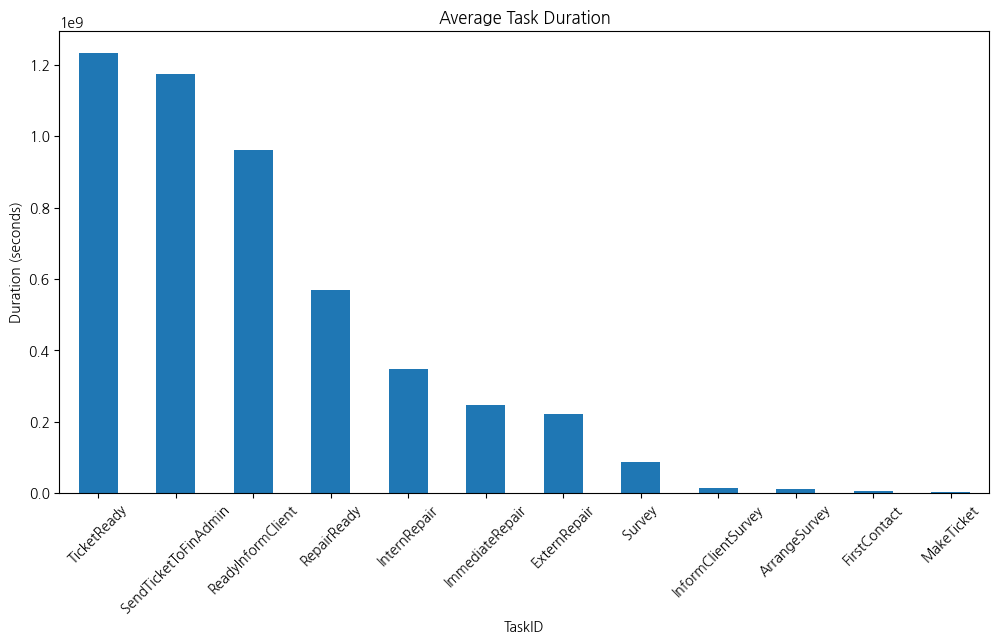

In [38]:
# next_datetime와 task_duration 다시 계산
data['next_datetime'] = data.groupby('caseID')['datetime'].shift(-1)
data['task_duration'] = (data['next_datetime'] - data['datetime']).dt.total_seconds()

# 음수 제거
data = data[data['task_duration'] >= 0]

# 평균 작업 소요 시간 재계산
task_duration_avg = data.groupby('taskID')['task_duration'].mean().sort_values(ascending=False)
print(task_duration_avg)

# 그래프 다시 그리기
task_duration_avg.plot(kind='bar', figsize=(12, 6))
plt.title("Average Task Duration")
plt.xlabel("TaskID")
plt.ylabel("Duration (seconds)")
plt.xticks(rotation=45)
plt.show()


In [39]:
# 작업 빈도와 평균 소요 시간 결합
task_frequency = data['taskID'].value_counts()
task_analysis = pd.DataFrame({
    'Frequency': task_frequency,
    'Avg_Duration': task_duration_avg
}).sort_values(by='Avg_Duration', ascending=False)
print(task_analysis)

                      Frequency  Avg_Duration
taskID                                       
TicketReady                  20  1.232389e+09
SendTicketToFinAdmin         25  1.174468e+09
ReadyInformClient            30  9.600009e+08
RepairReady                  90  5.698566e+08
InternRepair                189  3.472911e+08
ImmediateRepair             182  2.458709e+08
ExternRepair                 29  2.225266e+08
Survey                      664  8.726253e+07
InformClientSurvey          538  1.513234e+07
ArrangeSurvey              1247  1.309426e+07
FirstContact                823  5.105887e+06
MakeTicket                 1478  3.913040e+06


In [40]:
# 소요 시간이 가장 긴 caseID 확인
case_duration = data.groupby('caseID')['task_duration'].sum().sort_values(ascending=False)
print(case_duration.head(10))  # 상위 10개 case 출력

caseID
265    3.631805e+09
1      2.040366e+09
318    2.039496e+09
992    2.039152e+09
180    2.039032e+09
959    2.039011e+09
716    1.651005e+09
532    1.650176e+09
989    1.643415e+09
97     1.642982e+09
Name: task_duration, dtype: float64


작업별 평균 소요시간 분석

In [41]:
# 작업 빈도와 평균 소요 시간 결합
task_frequency = data['taskID'].value_counts()
task_analysis = pd.DataFrame({
    'Frequency': task_frequency,
    'Avg_Duration': task_duration_avg
}).sort_values(by='Avg_Duration', ascending=False)
print(task_analysis)


                      Frequency  Avg_Duration
taskID                                       
TicketReady                  20  1.232389e+09
SendTicketToFinAdmin         25  1.174468e+09
ReadyInformClient            30  9.600009e+08
RepairReady                  90  5.698566e+08
InternRepair                189  3.472911e+08
ImmediateRepair             182  2.458709e+08
ExternRepair                 29  2.225266e+08
Survey                      664  8.726253e+07
InformClientSurvey          538  1.513234e+07
ArrangeSurvey              1247  1.309426e+07
FirstContact                823  5.105887e+06
MakeTicket                 1478  3.913040e+06


소요시간 가장긴 caseID찾기

In [42]:
case_duration = data.groupby('caseID')['task_duration'].sum().sort_values(ascending=False)

# 소요 시간이 가장 긴 10개 case 확인
print(case_duration.head(10))

caseID
265    3.631805e+09
1      2.040366e+09
318    2.039496e+09
992    2.039152e+09
180    2.039032e+09
959    2.039011e+09
716    1.651005e+09
532    1.650176e+09
989    1.643415e+09
97     1.642982e+09
Name: task_duration, dtype: float64


In [43]:
# 소요 시간이 가장 긴 caseID 선택
longest_case = case_duration.idxmax()

# 해당 caseID의 작업 흐름 확인
case_flow = data[data['caseID'] == longest_case][['taskID', 'datetime', 'task_duration']].sort_values(by='datetime')

# 결과 출력
print(f"Case ID {longest_case}의 작업 흐름:\n", case_flow)

Case ID 265의 작업 흐름:
                    taskID            datetime  task_duration
1378         FirstContact 1905-05-23 00:00:00   2.039196e+09
5142           MakeTicket 1970-01-03 19:24:00   1.800000e+02
2936        ArrangeSurvey 1970-01-03 19:27:00   0.000000e+00
10440          MakeTicket 1970-01-03 19:27:00   2.400000e+02
8861   InformClientSurvey 1970-01-03 19:31:00   2.171400e+05
6134               Survey 1970-01-06 07:50:00   3.894000e+04
7259         InternRepair 1970-01-06 18:39:00   2.316000e+04
7362    ReadyInformClient 1970-01-07 01:05:00   1.592329e+09


프로세스 흐름 시각화

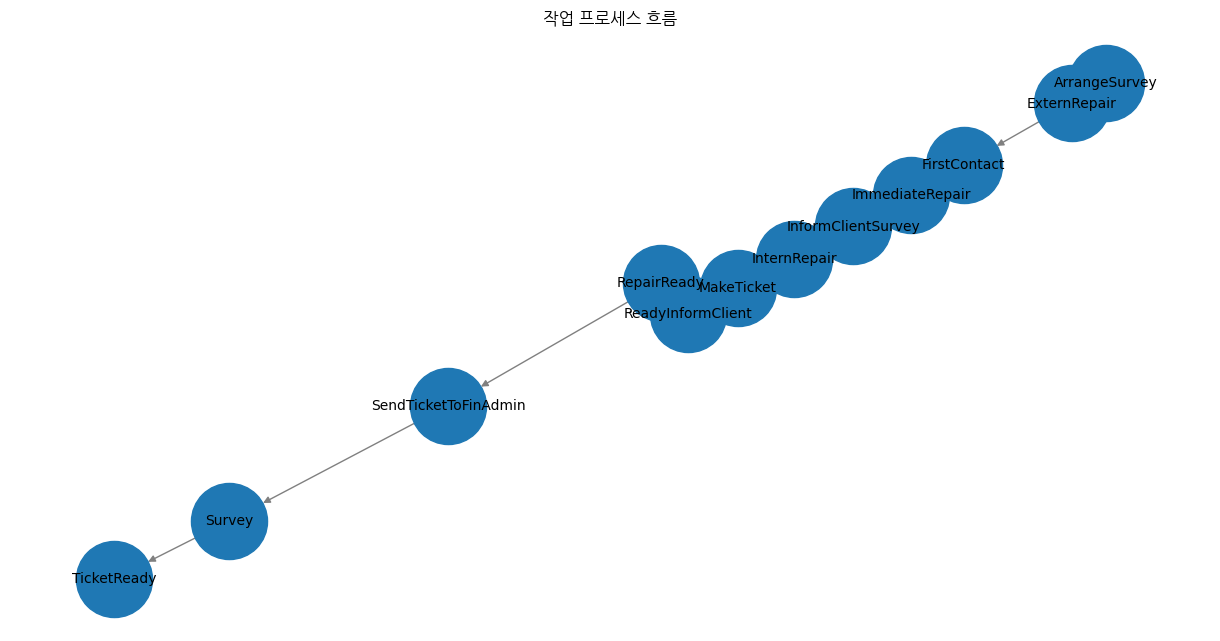

In [46]:
import networkx as nx
import matplotlib.pyplot as plt

# taskID 간의 연결 관계를 분석
task_transitions = data.groupby(['taskID'])['taskID'].count()

# 네트워크 그래프 생성
G = nx.DiGraph()

# 노드 및 엣지 추가
for i, (task, count) in enumerate(task_transitions.items()):
    if i < len(task_transitions) - 1:
        next_task = list(task_transitions.keys())[i + 1]
        G.add_edge(task, next_task, weight=count)

# 그래프 시각화
plt.figure(figsize=(12, 6))
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=10, edge_color="gray", arrows=True)
plt.title("작업 프로세스 흐름")
plt.show()

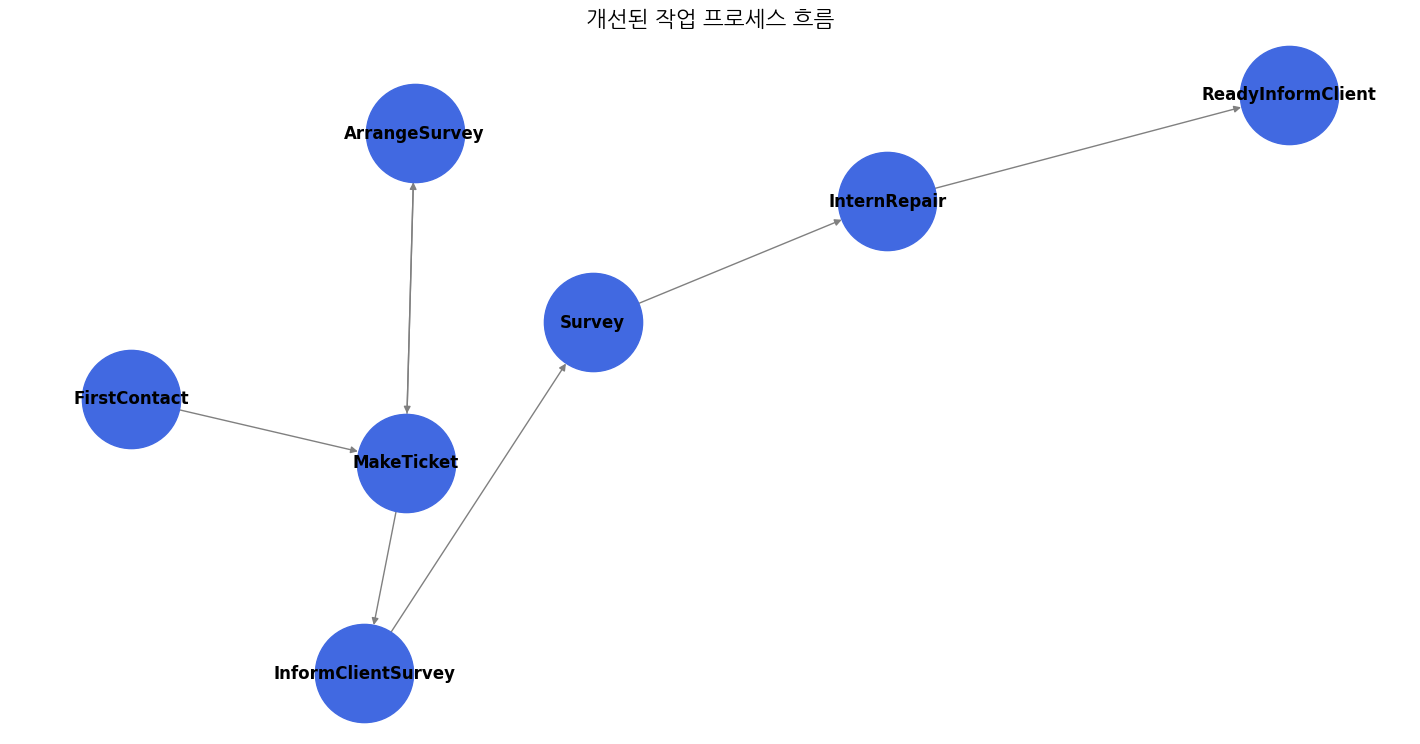

In [48]:
# 네트워크 그래프 생성
G = nx.DiGraph()

# 노드 및 엣지 추가 (taskID의 순서를 기반으로 흐름 생성)
for i in range(len(case_flow) - 1):
    G.add_edge(case_flow.iloc[i]['taskID'], case_flow.iloc[i + 1]['taskID'])

# 그래프 시각화 설정
plt.figure(figsize=(14, 7))  # 그래프 크기 키우기
pos = nx.spring_layout(G, k=0.5)  # 노드 간격 조정 (k값 조절)

# 노드 및 엣지 스타일 조정
nx.draw(G, pos, with_labels=True, node_size=5000, font_size=12, font_color="black", 
        edge_color="gray", font_weight="bold", arrows=True, node_color="royalblue")

# 제목 설정
plt.title("개선된 작업 프로세스 흐름", fontsize=16)
plt.show()

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# 사용할 피처 선택
features = ['taskID', 'originator', 'EstimatedRepairTime']
target = 'task_duration'  # 실제 소요 시간 예측

# 카테고리형 변수 인코딩
data_encoded = pd.get_dummies(data[features])

# 훈련 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data[target], test_size=0.2, random_state=42)

# 모델 학습 (랜덤 포레스트 회귀)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"평균 절대 오차(MAE): {mae:.2f} 초")

평균 절대 오차(MAE): 88631478.16 초


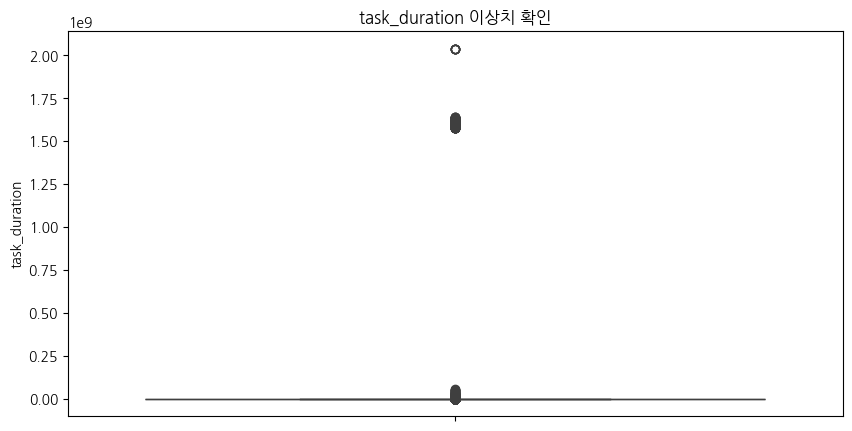

In [54]:
# task_duration의 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data['task_duration'])
plt.title("task_duration 이상치 확인")
plt.show()

# 이상치 제거 (예: 99% 이상 값 제거)
upper_limit = data['task_duration'].quantile(0.99)
data = data[data['task_duration'] <= upper_limit]

In [55]:
from sklearn.preprocessing import StandardScaler

# 숫자형 변수 스케일링 (task_duration, EstimatedRepairTime)
scaler = StandardScaler()
data[['EstimatedRepairTime', 'task_duration']] = scaler.fit_transform(data[['EstimatedRepairTime', 'task_duration']])

In [57]:
print(f"data_encoded shape: {data_encoded.shape}")  # 입력 데이터 크기
print(f"task_duration shape: {data['task_duration'].shape}")  # 타겟 데이터 크기

data_encoded shape: (5315, 29)
task_duration shape: (5261,)


In [58]:
# 결측치 개수 확인
print(data[['task_duration']].isnull().sum())

# 결측치 제거
data = data.dropna(subset=['task_duration'])

task_duration    0
dtype: int64


In [59]:
# 인덱스 동기화
data_encoded = data_encoded.loc[data.index]

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 훈련 데이터 재분리
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['task_duration'], test_size=0.2, random_state=42)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"개선된 평균 절대 오차(MAE): {mae:.2f} 초")

개선된 평균 절대 오차(MAE): 0.30 초


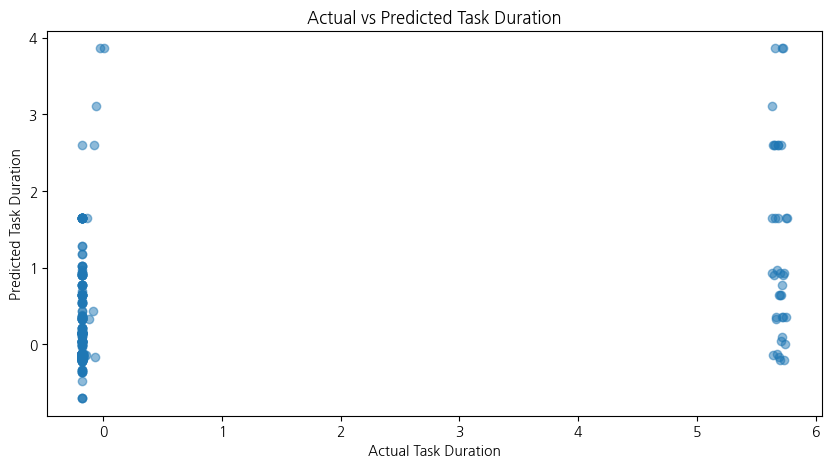

In [61]:
import matplotlib.pyplot as plt

# 실제 값 vs 예측 값 비교
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Task Duration")
plt.ylabel("Predicted Task Duration")
plt.title("Actual vs Predicted Task Duration")
plt.show()

In [64]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 데이터셋을 다시 분리
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['task_duration'], test_size=0.2, random_state=42)

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# MAE 평가
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.2f} 초")

XGBoost MAE: 0.28 초


In [65]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],   # 트리 개수 조정
    'max_depth': [4, 6, 8],            # 트리 깊이 조정
    'learning_rate': [0.01, 0.1, 0.2]  # 학습률 조정
}

# GridSearch 적용
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적 모델로 예측
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

# MAE 계산
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
print(f"튜닝 후 XGBoost MAE: {mae_best_xgb:.2f} 초")

Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
튜닝 후 XGBoost MAE: 0.28 초


In [66]:
import numpy as np

# 로그 변환 적용
data['task_duration'] = np.log1p(data['task_duration'])

In [67]:
# 로그 변환된 데이터를 사용하여 다시 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['task_duration'], test_size=0.2, random_state=42)

# XGBoost 모델 재학습 (튜닝된 하이퍼파라미터 적용)
best_xgb.fit(X_train, y_train)

# 예측
y_pred_log = best_xgb.predict(X_test)

# 예측값 역변환 (로그 -> 원래 값)
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# MAE 계산
mae_log_xgb = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"로그 변환 후 XGBoost MAE: {mae_log_xgb:.2f} 초")

로그 변환 후 XGBoost MAE: 0.24 초


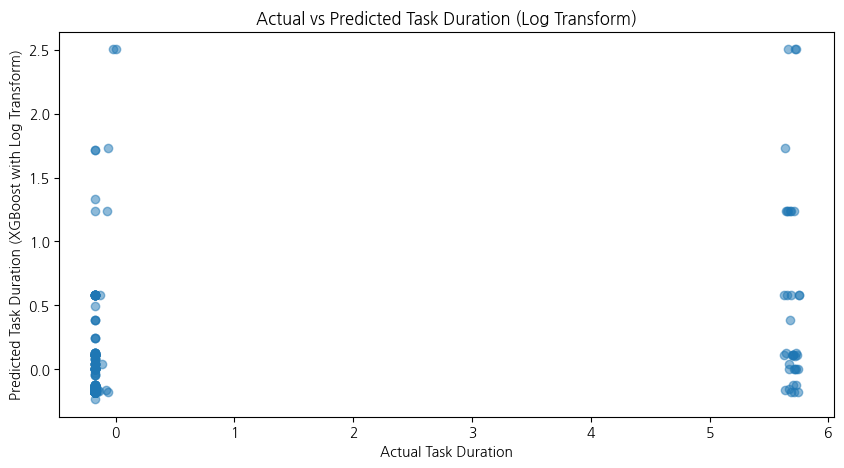

In [68]:
import matplotlib.pyplot as plt

# 로그 변환 후 예측 vs 실제 값 비교
plt.figure(figsize=(10,5))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.xlabel("Actual Task Duration")
plt.ylabel("Predicted Task Duration (XGBoost with Log Transform)")
plt.title("Actual vs Predicted Task Duration (Log Transform)")
plt.show()

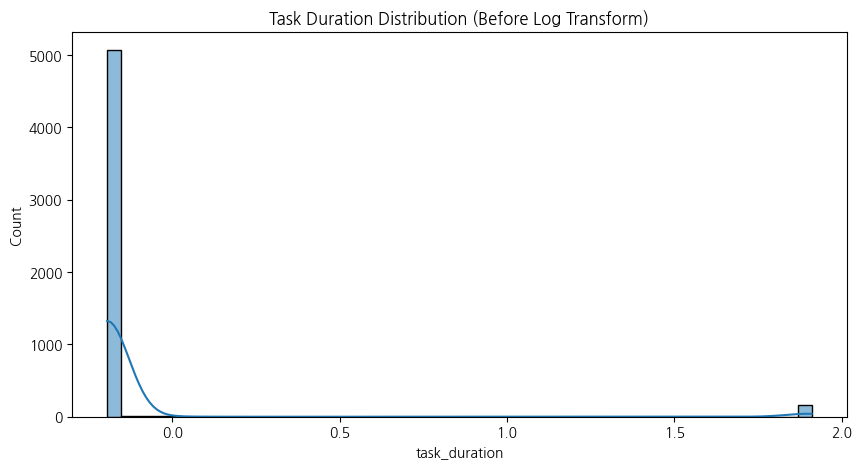

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# 기존 task_duration 분포 확인
plt.figure(figsize=(10,5))
sns.histplot(data['task_duration'], bins=50, kde=True)
plt.title("Task Duration Distribution (Before Log Transform)")
plt.show()

In [70]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 적용
scaler = MinMaxScaler()
data['task_duration_scaled'] = scaler.fit_transform(data[['task_duration']])

In [71]:
# 시간 관련 추가 변수 생성
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday

In [72]:
# 데이터셋 재분리
X_train, X_test, y_train, y_test = train_test_split(data_encoded, data['task_duration_scaled'], test_size=0.2, random_state=42)

# XGBoost 모델 재학습
best_xgb.fit(X_train, y_train)

# 예측
y_pred_scaled = best_xgb.predict(X_test)

# 예측값 역변환 (MinMax Scaling 원래 값으로 복구)
y_pred_actual = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# MAE 계산
mae_scaled_xgb = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"MinMax Scaling 적용 후 XGBoost MAE: {mae_scaled_xgb:.2f} 초")


MinMax Scaling 적용 후 XGBoost MAE: 0.10 초


In [73]:
# 모델 성능 비교
print(f"Baseline 선형 회귀 MAE: {mae:.2f} 초")  # 초기 선형 회귀 모델
print(f"XGBoost MAE (기본): {mae_xgb:.2f} 초")  # 기본 XGBoost 모델
print(f"XGBoost MAE (MinMax Scaling 적용): {mae_scaled_xgb:.2f} 초")  # 최적화된 XGBoost

Baseline 선형 회귀 MAE: 0.30 초
XGBoost MAE (기본): 0.28 초
XGBoost MAE (MinMax Scaling 적용): 0.10 초


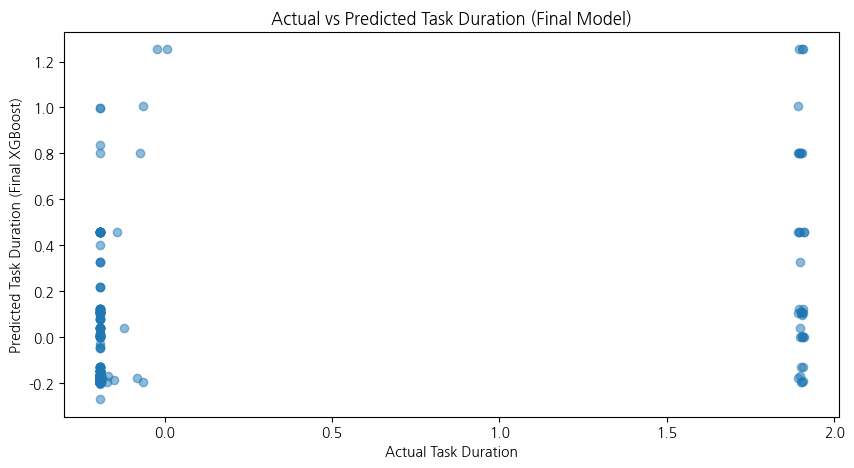

In [74]:
import matplotlib.pyplot as plt

# 최종 예측 결과 vs 실제값 비교
plt.figure(figsize=(10,5))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.xlabel("Actual Task Duration")
plt.ylabel("Predicted Task Duration (Final XGBoost)")
plt.title("Actual vs Predicted Task Duration (Final Model)")
plt.show()

In [75]:
# datetime 컬럼을 활용하여 시간(hour) 추출
data['hour'] = data['datetime'].dt.hour  # 'datetime' 컬럼에서 시간(hour)만 추출

# 시간(hour)별 TaskID의 평균 소요 시간 계산
heatmap_data = data.groupby(['taskID', 'hour'])['task_duration'].mean().unstack()

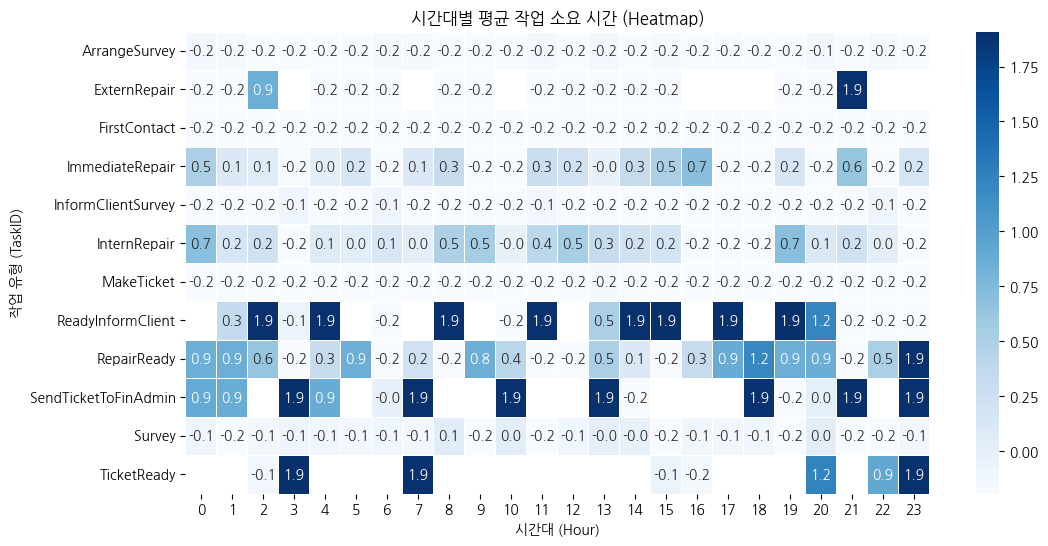

In [79]:
from IPython.display import FileLink

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".1f", linewidths=0.5)
plt.title("시간대별 평균 작업 소요 시간 (Heatmap)")
plt.xlabel("시간대 (Hour)")
plt.ylabel("작업 유형 (TaskID)")
plt.savefig("my_graph.png", dpi=300, bbox_inches='tight')
FileLink("my_graph.png")  # 클릭하면 다운로드 가능
plt.show()